In [1]:
import os, sys
sys.path.append('/rds/general/user/tla19/home/FYP/MAax')

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read JSON files
with open('batch_times_avg_100.json', 'r') as f1:
    data1 = json.load(f1)

In [4]:
# Process data
x_values = sorted(map(int, set(data1.keys())))
mean1_values = []
std1_values = []

unjit_times = dict()

for x in x_values:
    times1 = data1[str(x)][1:]  # Discard the first entry
    unjit_times[x] = data1[str(x)][1]
    mean1 = np.mean(times1)
    std1 = np.std(times1)
    mean1_values.append(mean1)
    std1_values.append(std1)
    

In [5]:
# Process evals per sec
eval_mean_values = []
eval_std_values = []

eval_batch_sizes = x_values[:-1]

for x in eval_batch_sizes:
    times = np.asarray(data1[str(x)][1:])  # Discard the first entry
    evals_per_sec = (100 * x) / times
    mean = np.mean(evals_per_sec)
    std = np.std(evals_per_sec)
    eval_mean_values.append(mean)
    eval_std_values.append(std)

print("Eval mean: ", eval_mean_values)

Eval mean:  [148.63744350942173, 217.24040642374734, 247.68068042663475, 266.11327923715913, 277.08153009764925, 282.7440822538037, 285.6479376210106]


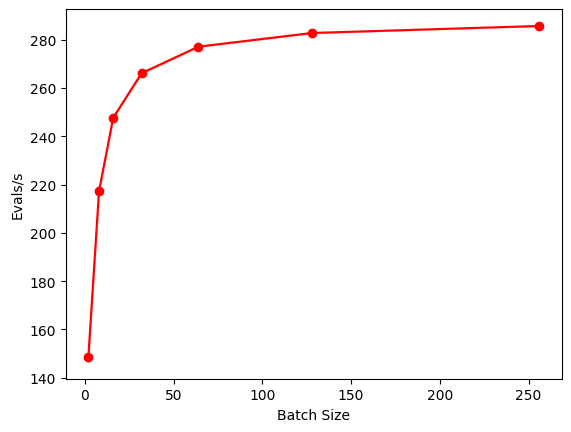

In [6]:
# Plotting
plt.plot(eval_batch_sizes, eval_mean_values, marker='o', color='red')
plt.fill_between(eval_batch_sizes, np.array(eval_mean_values) - np.array(eval_std_values),
                 np.array(eval_mean_values) + np.array(eval_std_values),
                 alpha=0.3, color='red')
plt.xlabel('Batch Size')
plt.ylabel('Evals/s')
# plt.title('Influence of Object Count and Type on Rollout Execution Time')
plt.savefig('batch_evals.png')
plt.show()

In [7]:
# # Plotting
# plt.plot(x_values, mean1_values, marker='o', color='blue')
# plt.fill_between(x_values, np.array(mean1_values) - np.array(std1_values),
#                  np.array(mean1_values) + np.array(std1_values),
#                  alpha=0.3, color='blue')
# plt.xlabel('Batch Size')
# plt.ylabel('Rollout Time')
# # plt.title('Influence of Object Count and Type on Rollout Execution Time')
# plt.savefig('batchvs.png')
# plt.show()